In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-23 14:34:26.997367: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-23 14:34:28.650808: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-23 14:34:29.091046: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:34:29.093784: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:34:29.096416: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM

In [3]:
help(gp2.KUNetPlus2D)

Help on class KUNetPlus2D in module gp2.gp2.classifiers.k_unet_plus2d:

class KUNetPlus2D(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KUNetPlus2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=True, unpool=True, deep_supervision=False, backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='xnet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Keras U-net++ 2D model.
 |  
 |  Method resolution order:
 |      KUNetPlus2D
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation

In [4]:
R = Runner(verbose=True, 
           classifier='kunetplus2d',
           discriminator='cnn',
           filter_num= [16, 32, 64, 128, 256, 512, 1024],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=True, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=None, 
           metric=None           
          )

2023-04-23 14:34:34.946976: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 14:34:35.348806: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:34:35.351258: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:34:35.353651: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmpu_ssqa4sGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmpu_ssqa4sGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128, 256, 512, 1024], 'n_labels': 1, 'stack_num_down': 3, 'stack_num_up': 3, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': True, 'unpool': True, 'deep_supervision': False, 'backbone': None, 'weights': None, 'freeze_backbone': True, 'freeze_batch_norm': True, 'name': 'xnet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f3f01e1b2e0>, 'loss': <function binary_crossentropy at 0x7f3f0a0abb80>, 'metric': [<function Util.dice_coef at 0x7f3f09e31940>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f3ea21528e0>}
Model summary:
Model: "xnet_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(No

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=2)     

Weights OK!
******
Loop 0


2023-04-23 14:35:28.383116: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-23 14:35:28.402988: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-23 14:35:32.568673: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-23 14:35:33.265826: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-23 14:35:34.227225: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-23 14:35:34.227251: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-23 14:35:34.227309: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-23 14:35:34.247451: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-23 14:35:35.029761: I tensorflow/stream_exec

4/4 [==============================] - 37s 6s/step - loss: 0.6295 - dice_coef: 0.1542 - val_loss: 0.6919 - val_dice_coef: 0.1635


2023-04-23 14:36:09.986527: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.6226 - dice_coef: 0.1564 - val_loss: 0.6895 - val_dice_coef: 0.1634
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.6189 - dice_coef: 0.1571 - val_loss: 0.6880 - val_dice_coef: 0.1634
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.6037 - dice_coef: 0.1620 - val_loss: 0.6861 - val_dice_coef: 0.1633
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.5934 - dice_coef: 0.1650 - val_loss: 0.6846 - val_dice_coef: 0.1633
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 0.5936 - dice_coef: 0.1652 - val_loss: 0.6839 - val_dice_coef: 0.1632
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.5938 - dice_coef: 0.1652 - val_loss: 0.6831 - val_dice_coef: 0.1632
Model saved to: /tmp/tmpu_ssqa4sGP2/xnet_0xnet_model
History saved to: /tmp/tmpu_ssqa4sGP2/xnet_history_0.pkl
Testing the classifier...
Model saved to /tmp/cnnd

Epoch 1/100
5/5 [==============================] - 14s 3s/step - loss: 0.5870 - dice_coef: 0.1667 - val_loss: 0.6822 - val_dice_coef: 0.1632
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.5869 - dice_coef: 0.1660 - val_loss: 0.6816 - val_dice_coef: 0.1631
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.5829 - dice_coef: 0.1682 - val_loss: 0.6825 - val_dice_coef: 0.1632
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.5701 - dice_coef: 0.1697 - val_loss: 0.6846 - val_dice_coef: 0.1633
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.5549 - dice_coef: 0.1694 - val_loss: 0.6842 - val_dice_coef: 0.1634
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.5423 - dice_coef: 0.1764 - val_loss: 0.6858 - val_dice_coef: 0.1633
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.5297 - dice_coef: 0.1814 - val_loss: 0.6312 - val_dice_coef: 0.1599
Epoch 8/100
5/5 [==

Replacing 46 from 140 !
D_relabeled_ 46
selected_ids ['cb996517-a3dd-4fb6-bf42-5cc77032dff9', '945fe56c-136c-4855-9c02-0fe2fbe02582', '759d4fec-d834-413b-b318-454d0ae45f2d', 'f827b258-9537-482a-9dbd-7468a593c72e', '6e1e0b1a-1de7-4c7d-a9e4-382ae4a9a14f', 'd38a8cb4-f415-4022-92c0-ab4d55ba8777', '00f9cc01-70da-429f-b908-b3a178bb5935', 'fd5bacdf-d1d0-4f94-8f19-0a21a53c5d2c', '863457bc-1659-485b-9a67-b3ce4c0359a6', '1ff99dda-c17e-4af6-ab6b-55ab6df271fb', 'c70b7cf0-e8b9-4adf-8676-248d3d50c795', 'e31e6893-42e8-48b0-b9c2-5870bf76d802', '33fe9ea4-676d-48f8-84fd-89b20b2d2c43', '9b82401b-dae5-4cc4-9e3e-b45c747e4374', 'bb6b66a6-36d6-456a-b5d9-9413864abbb6', 'd52d207c-fb70-4732-b309-38bd0f0a9454', '13239cfb-dca6-4aec-aeb2-f0145150db88', '8a016a2c-2c2b-4a9f-82e1-7c09cd077559', '5376092a-d98c-4252-9089-ab2f8811ed3c', '0943fa0d-641d-4f5a-8feb-0e3aca3d650e', 'd215ed46-51bb-432b-9c35-3a38b5749336', '7db373b2-bd97-455b-ab73-507612a742a3', '8476db6c-ec3b-432f-8ee1-69482c4b32f3', '3d567645-fa46-443f-b318-6

In [11]:
R.classifier_scores

[[0.6830846071243286, 0.16225478053092957],
 [1.4385521411895752, 9.425073585589416e-06]]

In [12]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0]]

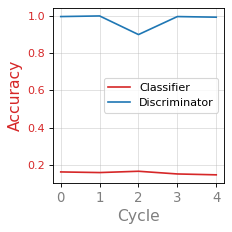

In [14]:
R.plot()

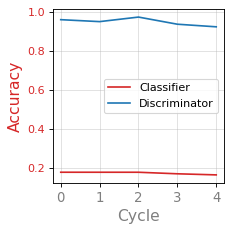

In [18]:
R.plot()